In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
data=pd.read_csv("Combined_Jobs_Final.csv")
data.head()


,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC


In [ ]:
data.isnull().sum()

Job.ID                   0
Provider                 0
Status                   0
Slug                     0
Title                    1
Position                 1
Company                155
City                    12
State.Name              13
State.Code              13
Address               4552
Latitude                 1
Longitude                1
Industry              4543
Job.Description          2
Requirements          4552
Salary                4543
Listing.Start           10
Listing.End             10
Employment.Type          1
Education.Required      10
Created.At               1
Updated.At               1
dtype: int64

In [ ]:
data.nunique()

Job.ID                4552
Provider                 2
Status                   1
Slug                  4552
Title                 3073
Position              2906
Company                943
City                  1556
State.Name              51
State.Code              51
Address                  0
Latitude              2686
Longitude             2694
Industry                 2
Job.Description       3268
Requirements             0
Salary                   5
Listing.Start            6
Listing.End              6
Employment.Type          5
Education.Required       5
Created.At            3173
Updated.At            2920
dtype: int64

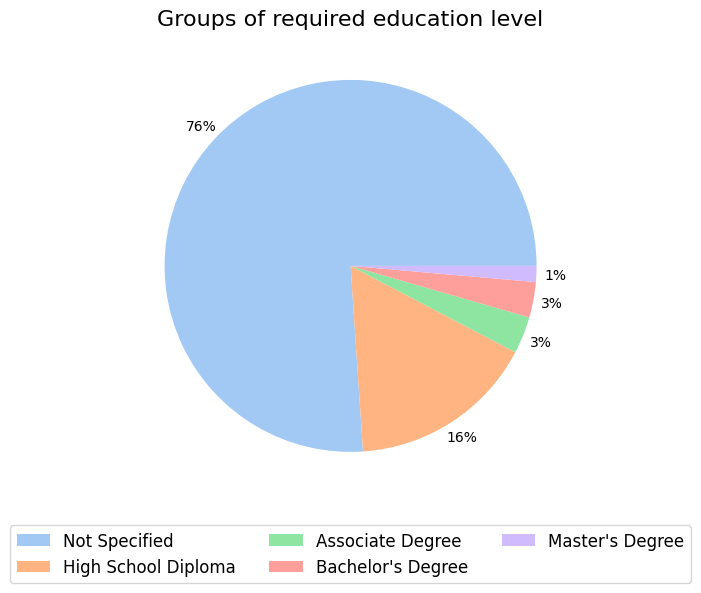

In [ ]:
edu_level = data["Education.Required"].value_counts().reset_index()
edu_level.columns = ["Education.Required", "count"]
import seaborn as sns
import matplotlib.pyplot as plt
#define Seaborn color palette to use
colors = sns.color_palette("pastel")

#create pie chart
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(edu_level["count"], colors = colors, autopct="%.0f%%", pctdistance=1.1)
plt.title("Groups of required education level", fontsize=16)
plt.legend(edu_level["Education.Required"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()

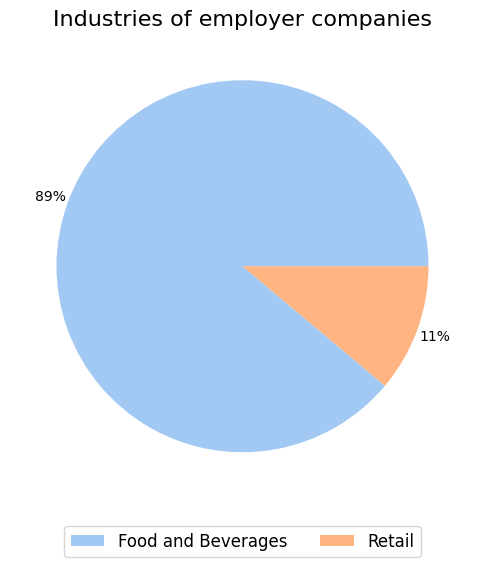

In [ ]:
industry = data["Industry"].value_counts().reset_index()
industry.columns = ["Industry", "count"]

#define Seaborn color palette to use
colors = sns.color_palette("pastel")

#create pie chart
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(industry["count"], colors=colors, autopct="%.0f%%", pctdistance=1.1)
plt.title("Industries of employer companies", fontsize=16)
plt.legend(industry["Industry"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()

count     9.000000
mean      7.677778
std       4.500980
min       0.000000
25%       8.000000
50%      10.000000
75%      10.550000
max      11.000000
Name: Salary, dtype: float64

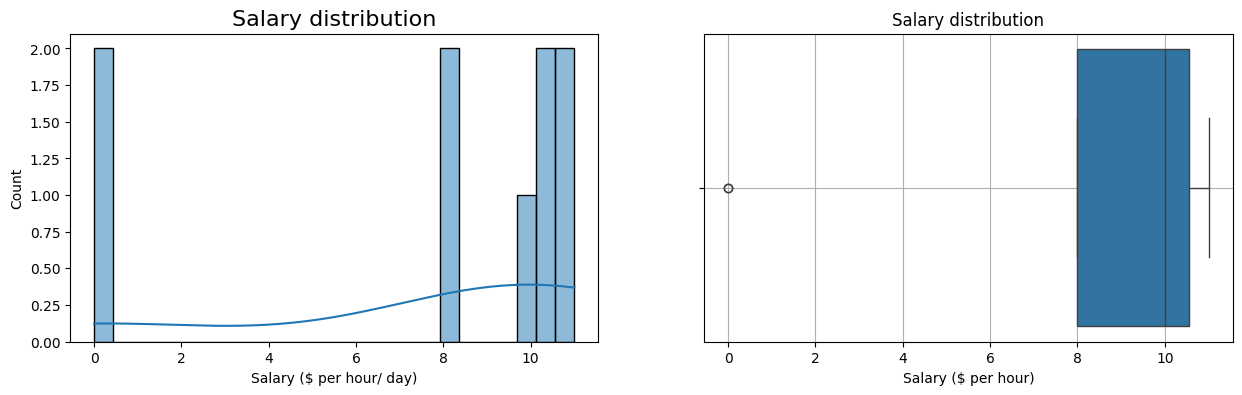

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

# create histogram
sns.histplot(
    data["Salary"],
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title("Salary distribution", fontsize=16);
axes[0].set_xlabel("Salary ($ per hour/ day)")

# create boxplot
sns.boxplot(
    data["Salary"],
    orient="h",
    width=0.9,
    ax=axes[1]
);
axes[1].set_title("Salary distribution");
axes[1].set_xlabel("Salary ($ per hour)");
axes[1].grid()

data["Salary"].describe()

From the plotting we find that there are outilers and since there is only 229 rows with values,hence they are removed.

In [ ]:
cols = list(['Job.ID']+['Slug']+['Title']+['Position']+ ['Company']+['City']+['Employment.Type']+['Education.Required']+['Job.Description'])

In [ ]:
data =data[cols]
data.columns = ['Job.ID','Slug', 'Title', 'Position', 'Company','City', 'Empl_type','Edu_req','Job_Description']
data.head()

,Job.ID,Slug,Title,Position,Company,City,Empl_type,Edu_req,Job_Description
0,111,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,Part-Time,NaN,Tacolicious' first Palo Alto store just opened...
1,113,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,NaN,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,Part-Time,NaN,We are a popular Mediterranean wine bar and re...
3,121,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,Part-Time,NaN,● Serve food/drinks to customers in a profess...
4,127,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,Part-Time,NaN,"Located at the heart of Hollywood, we are one ..."


In [ ]:
data.isnull().sum()

Job.ID               0
Slug                 0
Title                1
Position             1
Company            155
City                12
Empl_type            1
Edu_req             10
Job_Description      2
dtype: int64

In [ ]:
nan_city = data[pd.isnull(data['City'])]
print(nan_city.shape)
nan_city.head()

(12, 9)


,Job.ID,Slug,Title,Position,Company,City,Empl_type,Edu_req,Job_Description
3425,142044,ga-st-francis-hospital-registered-nurse-rn-142044,Registered Nurse (RN) @ St. Francis Hospital,Registered Nurse (RN),St. Francis Hospital,NaN,Full-Time/Part-Time,Associate Degree,Under the direction of the Clinical Coordinato...
3433,142054,chi-payment-systems-sales-representative-busin...,Sales Representative - Business Development Op...,Sales Representative - Business Development Op...,CHI Payment Systems,NaN,Full-Time/Part-Time,High School Diploma,"If you&rsquo;re energetic, motivated, hardwork..."
3434,142055,chi-payment-systems-new-business-executive-142055,New Business Executive @ CHI Payment Systems,New Business Executive,CHI Payment Systems,NaN,Full-Time/Part-Time,High School Diploma,"If you&rsquo;re energetic, motivated, hardwork..."
3435,142056,chi-payment-systems-outside-sales-representati...,Outside Sales Representative (Business Develop...,Outside Sales Representative (Business Develop...,CHI Payment Systems,NaN,Full-Time/Part-Time,High School Diploma,"If you&rsquo;re energetic, motivated, hardwork..."
3436,142057,chi-payment-systems-outside-sales-representati...,Outside Sales Representative @ CHI Payment Sys...,Outside Sales Representative,CHI Payment Systems,NaN,Full-Time/Part-Time,High School Diploma,"If you&rsquo;re energetic, motivated, hardwork..."


In [ ]:
nan_city.groupby(['Company'])['City'].count()

Company
CHI Payment Systems     0
St. Francis Hospital    0
Name: City, dtype: int64

In [ ]:


#Since there are only 9 cities with NaN values we manually replace them

In [ ]:
data['Company'] = data['Company'].replace(['Genesis Health Systems'], 'Genesis Health System')

data.loc[data.Company == 'CHI Payment Systems', 'City'] = 'Illinois'
data.loc[data.Company == 'Academic Year In America', 'City'] = 'Stamford'
data.loc[data.Company == 'CBS Healthcare Services and Staffing ', 'City'] = 'Urbandale'
data.loc[data.Company == 'Driveline Retail', 'City'] = 'Coppell'
data.loc[data.Company == 'Educational Testing Services', 'City'] = 'New Jersey'
data.loc[data.Company == 'Genesis Health System', 'City'] = 'Davennport'
data.loc[data.Company == 'Home Instead Senior Care', 'City'] = 'Nebraska'
data.loc[data.Company == 'St. Francis Hospital', 'City'] = 'New York'
data.loc[data.Company == 'Volvo Group', 'City'] = 'Washington'
data.loc[data.Company == 'CBS Healthcare Services and Staffing', 'City'] = 'Urbandale'

In [ ]:
data.isnull().sum()

Job.ID               0
Slug                 0
Title                1
Position             1
Company            155
City                 1
Empl_type            1
Edu_req             10
Job_Description      2
dtype: int64

In [ ]:
nan_emp_type = data[pd.isnull(data['Empl_type'])]
nan_emp_type.head()

,Job.ID,Slug,Title,Position,Company,City,Empl_type,Edu_req,Job_Description
4551,143777,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['Empl_type']=data['Empl_type'].fillna('Full-Time/Part-Time')
data.groupby(['Empl_type'])['Company'].count()
list(data)

['Job.ID',
 'Slug',
 'Title',
 'Position',
 'Company',
 'City',
 'Empl_type',
 'Edu_req',
 'Job_Description']

In [ ]:
data.isnull().sum()

Job.ID               0
Slug                 0
Title                1
Position             1
Company            155
City                 1
Empl_type            0
Edu_req             10
Job_Description      2
dtype: int64

In [ ]:
#in the case of education_req,lets look at the values

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

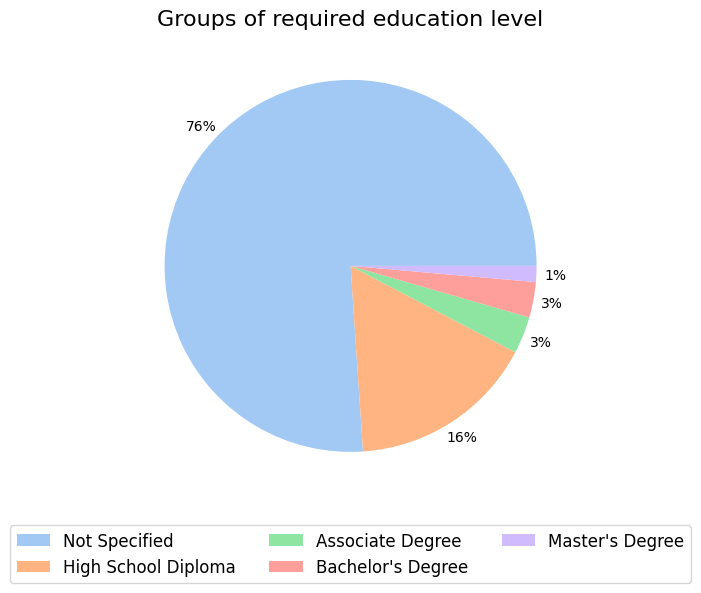

In [ ]:
edu_level = data["Edu_req"].value_counts().reset_index()
edu_level.columns = ["Edu_req", "count"]

#define Seaborn color palette to use
colors = sns.color_palette("pastel")

#create pie chart
plt.figure(facecolor='white', figsize=(6,8))
plt.pie(edu_level["count"], colors = colors, autopct="%.0f%%", pctdistance=1.1)
plt.title("Groups of required education level", fontsize=16)
plt.legend(edu_level["Edu_req"], loc="upper center", bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=12)

plt.show()

In [ ]:
#Since most of the value is termed as 'not specified' it does not add much value to training of the model. Therefore we drop that feature

In [ ]:
#Now lets look at the job description feature

In [ ]:
cols = list(["Job.ID"]+["Position"]+["Company"]+["City"]+["Empl_type"]+["Job_Description"])
data = data[cols]
data.columns = ["Job.ID", "Job_Position", "City","Company", "Empl_type ", "Job_description"]
display(data.head(2))

data = data.dropna(subset=["Job_description"])
data.shape

,Job.ID,Job_Position,City,Company,Empl_type,Job_description
0,111,Server,Tacolicious,Palo Alto,Part-Time,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,\r\n\r\nNew French Brasserie in S.F. Financia...


(4550, 6)

In [ ]:
data.isnull().sum()

Job.ID               0
Job_Position         0
City               154
Company              0
Empl_type            0
Job_description      0
dtype: int64

In [ ]:
duplicate = data[data.duplicated("Job_description")]

print("\nDuplicated rows in Job_description: \n")
display(duplicate.head(3))
print(f"\nNumber of duplicated rows: {duplicate.shape[0]}")


Duplicated rows in Job_description: 



,Job.ID,Job_Position,City,Company,Empl_type,Job_description
28,134296,Sales Professional,MICHAEL HILL,Chicago,Part-Time,What can Michael Hill offer you?\r\n\r\nA comm...
29,134297,Sales Professional,MICHAEL HILL,Chicago,Part-Time,What can Michael Hill offer you?\r\n\r\nA comm...
30,134298,Sales Professional,MICHAEL HILL,Columbus,Part-Time,What can Michael Hill offer you?\r\n\r\nA comm...



Number of duplicated rows: 1282


In [ ]:
data = data.drop_duplicates(subset=["Job_description"])
print(f"Total number of rows after deleting duplicates: {data.shape[0]}")

Total number of rows after deleting duplicates: 3268


In [ ]:
data.head()

,Job.ID,Job_Position,City,Company,Empl_type,Job_description
0,111,Server,Tacolicious,Palo Alto,Part-Time,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef,Claude Lane,San Francisco,Part-Time,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender,Machka Restaurants Corp.,San Francisco,Part-Time,We are a popular Mediterranean wine bar and re...
3,121,Server,Teriyaki House,Brisbane,Part-Time,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,Part-Time,"Located at the heart of Hollywood, we are one ..."


Text data often comes in different formats, styles, or languages. Cleaning involves standardizing the text by converting it to lowercase, removing accents, and ensuring consistent formatting. This helps in maintaining consistency and improves the generalization of the model.

Tokenization is the process of breaking down text into individual words or tokens. Cleaning may involve tokenization to prepare the text for further analysis or modeling.

Stopwords are common words (e.g., "and," "the," "is") that often do not contribute much to the meaning of a text. Cleaning may involve removing stopwords to focus on more meaningful words and improve model efficiency.

Lemmatization and stemming involve reducing words to their base or root form. Cleaning may include these processes to reduce the dimensionality of the data and ensure that different forms of the same word are treated as identical.

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text)
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [ ]:
job_data=pd.read_csv("job_data.csv")

In [ ]:
job_data.head()

,Unnamed: 0,Job.ID,text
0,0,111,server tacolici palo alto part time tacolici f...
1,1,113,kitchen staff chef claud lane san francisco pa...
2,2,117,bartend machka restaur corp. san francisco par...
3,3,121,server teriyaki hous brisban part time serv fo...
4,4,127,kitchen staff chef rosa mexicano sunset lo ang...


In [ ]:
job_data.dtypes

Unnamed: 0     int64
Job.ID         int64
text          object
dtype: object

In [ ]:
job_data['text'][1]

'kitchen staff chef claud lane san francisco part time new french brasseri s.f. financi district seek chef seek energet dynam chef take charg grow company. ideal candid motiv self starter great work ethic readi challeng build team execut support. posit perfect fit talent chef readi take next step someon multi task high volum kitchen except organiz skills. posit requir experi french cuisin minimum year sou chef high volum full servic restaurant. must team player lead exampl work side side member team. comput manag skill must experi order inventori cost control. right candid previous demonstr understand leadership account infecti energet approach problem solv face challenges. equal opportun employer. qualifi applic consid employ without regard age race religion sex nation origin sexual orient disabl veteran status.'

Lets look at the Experience dataset

In [ ]:
exp=pd.read_csv("Experience.csv")

In [ ]:
exp.head()

,Applicant.ID,Position.Name,Employer.Name,City,State.Name,State.Code,Start.Date,End.Date,Job.Description,Salary,Can.Contact.Employer,Created.At,Updated.At
0,10001,Account Manager / Sales Administration / Quali...,Barcode Resourcing,Bellingham,Washington,WA,2012-10-15,NaN,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
1,10001,Electronics Technician / Item Master Controller,Ryzex Group,Bellingham,Washington,WA,2001-12-01,2012-04-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
2,10001,Machine Operator,comptec inc,Custer,Washington,WA,1997-01-01,1999-01-01,NaN,NaN,NaN,2014-12-12 20:10:02 UTC,2014-12-12 20:10:02 UTC
3,10003,maintenance technician,Winn residental,washington,District of Columbia,DC,NaN,NaN,"Necessary maintenance for ""Make Ready"" Plumbin...",10.0,False,2014-12-12 21:27:05 UTC,2014-12-12 21:27:05 UTC
4,10003,Electrical Helper,michael and son services,alexandria,Virginia,VA,NaN,NaN,repair and services of electrical construction,NaN,False,2014-12-12 21:27:05 UTC,2014-12-12 21:27:05 UTC


In [ ]:
exp.nunique()

Applicant.ID            3790
Position.Name           4985
Employer.Name           7231
City                    1845
State.Name                51
State.Code                51
Start.Date              1771
End.Date                1379
Job.Description         5519
Salary                   397
Can.Contact.Employer       2
Created.At              3637
Updated.At              3585
dtype: int64

In [ ]:
exp.isnull().sum()

Applicant.ID               0
Position.Name            998
Employer.Name             85
City                    3762
State.Name              4058
State.Code              4058
Start.Date              2035
End.Date                3747
Job.Description         3007
Salary                  5855
Can.Contact.Employer    5072
Created.At                 0
Updated.At                 0
dtype: int64

In [ ]:
exp.iloc[45]

Applicant.ID                               1005
Position.Name                              none
Employer.Name                              none
City                                       none
State.Name                                  NaN
State.Code                                  NaN
Start.Date                                  NaN
End.Date                                    NaN
Job.Description                            none
Salary                                      NaN
Can.Contact.Employer                      False
Created.At              2014-08-15 22:05:48 UTC
Updated.At              2014-08-15 22:05:48 UTC
Name: 45, dtype: object

In [ ]:
exp["Job.Description"] = exp["Job.Description"].apply(lambda x: x if str(x).lower().replace(' ', '') != "none" and x is not None else np.nan)
exp["Position.Name"] = exp["Position.Name"].apply(lambda x: x if str(x).lower().replace(' ', '') != "none" and x is not None else np.nan)
exp["City"] = exp["City"].apply(lambda x: x if str(x).lower().replace(' ', '') != "none" and x is not None else np.nan)

In [ ]:
exp.iloc[45]

Applicant.ID                               1005
Position.Name                               NaN
Employer.Name                              none
City                                        NaN
State.Name                                  NaN
State.Code                                  NaN
Start.Date                                  NaN
End.Date                                    NaN
Job.Description                             NaN
Salary                                      NaN
Can.Contact.Employer                      False
Created.At              2014-08-15 22:05:48 UTC
Updated.At              2014-08-15 22:05:48 UTC
Name: 45, dtype: object

In [ ]:

#deleting rows with missing values in Position column and Job,Description column

In [ ]:
exp = exp.dropna(subset=["Job.Description", "Position.Name"])

In [ ]:
cols = list(["Applicant.ID"]+["Position.Name"]+["City"]+["Job.Description"])
exp = exp[cols]
exp.columns = ["Applicant.ID", "Position.Name", "City", "Job.Description"]
exp.head()

,Applicant.ID,Position.Name,City,Job.Description
3,10003,maintenance technician,washington,"Necessary maintenance for ""Make Ready"" Plumbin..."
4,10003,Electrical Helper,alexandria,repair and services of electrical construction
5,10003,technician,district heights,"basic auto maintenance, and customer services ..."
10,10007,Bartender,San Francisco,Support bar and management staff at a well-kno...
11,10007,Bar Manager / Head Bartender,San Francisco,•\tCollaborate with management team on a regul...


In [ ]:
exp.isnull().sum()

Applicant.ID          0
Position.Name         0
City               1670
Job.Description       0
dtype: int64

In [ ]:
#Lets remove the location feature since it won't help in the recommendation model

In [ ]:
cols = list(["Applicant.ID"]+["Position.Name"]+["City"]+["Job.Description"])
exp = exp[cols]

In [ ]:
#Now let's see the top job positions in the the 'Experience' datasheet

<ipython-input-52-4be5c6837b64>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


[Text(0.5, 1.0, "Top 10 applicant's job positions")]

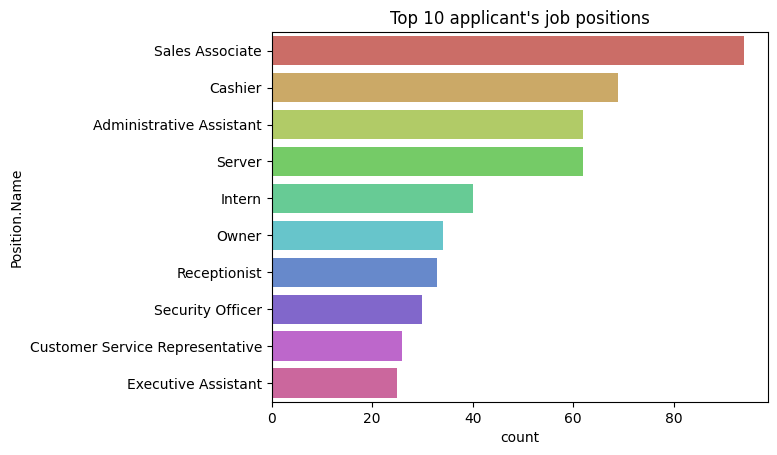

In [ ]:
top_positions = exp["Position.Name"].value_counts().reset_index()[:10]
top_positions.columns = ["Position.Name", "count"]

sns.barplot(
    x="count",
    y="Position.Name",
    data= top_positions,
    color="blue",
    palette="hls"
).set(title="Top 10 applicant's job positions")

In [ ]:
duplicate = exp[exp.duplicated("Job.Description")]
duplicate

,Applicant.ID,Position.Name,City,Job.Description
242,10587,Cashier,Arlington,"Cashier , cleaning , serving food , handling o..."
402,11060,Custodian/Carpenter,Los Angeles,Maintain building equipment
595,11413,Bus Driver,wilmington,transport kids to and from school
676,11568,Producer / (Design and Production),NaN,Work on diverse multimedia creative area of de...
678,11568,Art Director / Interactive Designer,NaN,Work on diverse multimedia creative area of de...
...,...,...,...,...
8377,9364,server,Washington,i was a server
8386,938,server,New York,customer service
8432,9452,Front desk reservations & ticketing agent,Addis Ababa Ethiopia,"Airline ticket sales & issuance, Airport Passe..."
8459,9517,Hardware Tester,Bellevue,Verifying bug fixes.\r\nWriting bug reports fo...


In [ ]:
print("\nDuplicated rows in Job_description: \n")
display(duplicate.head(3))
print(f"\nNumber of duplicated rows: {duplicate.shape[0]}")


Duplicated rows in Job_description: 



,Applicant.ID,Position.Name,City,Job.Description
242,10587,Cashier,Arlington,"Cashier , cleaning , serving food , handling o..."
402,11060,Custodian/Carpenter,Los Angeles,Maintain building equipment
595,11413,Bus Driver,wilmington,transport kids to and from school



Number of duplicated rows: 82


In [ ]:
exp = exp.drop_duplicates(subset=["Job.Description"])
print(f"Total number of rows after deleting duplicates: {exp.shape[0]}")

Total number of rows after deleting duplicates: 5490


In [ ]:
import pickle

In [ ]:
view=pd.read_csv("Job_Views.csv")

In [ ]:
view.head()

,Applicant.ID,Job.ID,Title,Position,Company,City,State.Name,State.Code,Industry,View.Start,View.End,View.Duration,Created.At,Updated.At
0,10000,73666,Cashiers & Valets Needed! @ WallyPark,Cashiers & Valets Needed!,WallyPark,Newark,New Jersey,NJ,NaN,2014-12-12 20:12:35 UTC,2014-12-12 20:31:24 UTC,1129.0,2014-12-12 20:12:35 UTC,2014-12-12 20:12:35 UTC
1,10000,96655,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's Seasonal Retail Fragrance Cashier - Ga...,Macy's,Garden City,New York,NY,NaN,2014-12-12 20:08:50 UTC,2014-12-12 20:10:15 UTC,84.0,2014-12-12 20:08:50 UTC,2014-12-12 20:08:50 UTC
2,10001,84141,Part Time Showroom Sales / Cashier @ Grizzly I...,Part Time Showroom Sales / Cashier,Grizzly Industrial Inc.,Bellingham,Washington,WA,NaN,2014-12-12 20:12:32 UTC,2014-12-12 20:17:18 UTC,286.0,2014-12-12 20:12:32 UTC,2014-12-12 20:12:32 UTC
3,10002,77989,Event Specialist Part Time @ Advantage Sales &...,Event Specialist Part Time,Advantage Sales & Marketing,Simpsonville,South Carolina,SC,NaN,2014-12-12 20:39:23 UTC,2014-12-12 20:42:13 UTC,170.0,2014-12-12 20:39:23 UTC,2014-12-12 20:39:23 UTC
4,10002,69568,Bonefish - Kitchen Staff @ Bonefish Grill,Bonefish - Kitchen Staff,Bonefish Grill,Greenville,South Carolina,SC,NaN,2014-12-12 20:43:25 UTC,2014-12-12 20:43:58 UTC,33.0,2014-12-12 20:43:25 UTC,2014-12-12 20:43:25 UTC


In [ ]:
#In this case we use columns- 'ApplicantID','Job.ID','Position','Company'and 'City'

In [ ]:
view = view[['Applicant.ID', 'Job.ID', 'Position', 'Company','City']]

In [ ]:
#We combine the features into one 1 feature

In [ ]:
view["viewed_details"] = view["Position"].map(str) + "  " + view["Company"]

<ipython-input-62-cdbc4a76c27d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view["viewed_details"] = view["Position"].map(str) + "  " + view["Company"]


In [ ]:
view['viewed_details'] = view['viewed_details'].str.lower()
view = view[['Applicant.ID','viewed_details','City']]
view.head()

<ipython-input-63-e9a41b9f96c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view['viewed_details'] = view['viewed_details'].str.lower()


,Applicant.ID,viewed_details,City
0,10000,cashiers & valets needed! wallypark,Newark
1,10000,macy's seasonal retail fragrance cashier - ga...,Garden City
2,10001,part time showroom sales / cashier grizzly in...,Bellingham
3,10002,event specialist part time advantage sales & ...,Simpsonville
4,10002,bonefish - kitchen staff bonefish grill,Greenville


In [ ]:
view['viewed_details'] = view['viewed_details'].map(str).apply(clean_txt)

In [ ]:
view.head()

,Applicant.ID,viewed_details,City
0,10000,cashier valet need wallypark,Newark
1,10000,macys seasonal retail fragrance cashier garden...,Garden City
2,10001,part time showroom sales cashier grizzly indus...,Bellingham
3,10002,event specialist part time advantage sales market,Simpsonville
4,10002,bonefish kitchen staff bonefish grill,Greenville


In [ ]:
#Since same applicants has mre than one viewed Details, then group them
view = view.groupby('Applicant.ID', sort=False)['viewed_details'].apply(' '.join).reset_index()
view.head()

,Applicant.ID,viewed_details
0,10000,cashier valet need wallypark macys seasonal re...
1,10001,part time showroom sales cashier grizzly indus...
2,10002,event specialist part time advantage sales mar...
3,10003,entry level security officer securitas securit...
4,10004,teller chester east cleveland keybank


Lets Look at the Position_Of_Interest.csv

In [ ]:
poi =  pd.read_csv("Positions_Of_Interest.csv")
poi.head()

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At
0,10003,security officer,2014-12-12 21:20:54 UTC,2014-12-12 21:20:54 UTC
1,10007,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
2,10007,Bartender,2014-08-14 15:56:44 UTC,2015-02-19 23:21:28 UTC
3,10008,Host,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
4,10008,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC


In [ ]:
poi = poi.sort_values(by='Applicant.ID')
poi.head()

,Applicant.ID,Position.Of.Interest,Created.At,Updated.At
6437,96,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1156,153,Barista,2014-08-14 15:56:43 UTC,2015-02-18 02:35:06 UTC
1155,153,Host,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1154,153,Server,2014-08-14 15:56:42 UTC,2015-02-26 20:35:12 UTC
1158,153,Sales Rep,2014-08-14 15:56:47 UTC,2015-03-02 02:13:08 UTC


In [ ]:
#Here we do not require created.At and Updated.At feature.They do not add much relevance to our model. Therefore they are dropped.

In [ ]:
poi = poi[['Applicant.ID', 'Position.Of.Interest']]
poi['Position.Of.Interest']=poi['Position.Of.Interest'].map(str).apply(clean_txt)
poi = poi.fillna(" ")
poi.head()

,Applicant.ID,Position.Of.Interest
6437,96,server
1156,153,barista
1155,153,host
1154,153,server
1158,153,sales rep


In [ ]:
#There are are more than one intereset for one applicant, therefore we join them

In [ ]:
poi = poi.groupby('Applicant.ID', sort=True)['Position.Of.Interest'].apply(' '.join).reset_index()
poi.head()

,Applicant.ID,Position.Of.Interest
0,96,server
1,153,barista host server sales rep customer service...
2,256,host production area sales rep customer servic...
3,438,customer service rep barista host server
4,568,receptionist customer service rep book keeper


In [ ]:
exp['Job.Description']=exp['Job.Description'].map(str).apply(clean_txt)
exp.head()

,Applicant.ID,Position.Name,City,Job.Description
3,10003,maintenance technician,washington,necessary maintenance make ready plumb electri...
4,10003,Electrical Helper,alexandria,repair service electrical construction
5,10003,technician,district heights,basic auto maintenance customer service report
10,10007,Bartender,San Francisco,support bar management staff well know nigh cl...
11,10007,Bar Manager / Head Bartender,San Francisco,collaborate management team regular basis revi...


By now we have completed the data cleaning and analysing of the same.

We will be combining the five datasets into one whole dataset so that it will be helpful for training the model

We remove Empl_type and Job_description Since it is present in the 'text' feature of job_data file.

In [ ]:
data=data[['Job.ID','Job_Position','Company','City']]
data.head()

,Job.ID,Job_Position,Company,City
0,111,Server,Palo Alto,Tacolicious
1,113,Kitchen Staff/Chef,San Francisco,Claude Lane
2,117,Bartender,San Francisco,Machka Restaurants Corp.
3,121,Server,Brisbane,Teriyaki House
4,127,Kitchen Staff/Chef,Los Angeles,Rosa Mexicano - Sunset


In [ ]:

job_data.head()

,Unnamed: 0,Job.ID,text
0,0,111,server tacolici palo alto part time tacolici f...
1,1,113,kitchen staff chef claud lane san francisco pa...
2,2,117,bartend machka restaur corp. san francisco par...
3,3,121,server teriyaki hous brisban part time serv fo...
4,4,127,kitchen staff chef rosa mexicano sunset lo ang...


In [ ]:
#recruiter = data.merge(job_data, left_on='Job.ID', right_on='Job.ID', how='outer')
#recruiter = recruiter.fillna(' ')
#recruiter = recruiter.sort_values(by='Job.ID')
#recruiter.head()

In [ ]:
df_jobs_exp = view.merge(exp, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
df_jobs_exp = df_jobs_exp.fillna(' ')
df_jobs_exp = df_jobs_exp.sort_values(by='Applicant.ID')
df_jobs_exp.head()

,Applicant.ID,viewed_details,Position.Name,City,Job.Description
5366,2,,Writer for the Uloop Blog,San Francisco,write article uloop blog site mostly read stud...
5367,2,,Volunteer,San Francisco,read aloud meir schneiders book record audio v...
6500,38,,Sales Person & Phone Receptionist,San Francisco,ask customer need assistance also check extra ...
3214,42,movie extras actors model want san francisco p...,,,
7857,78,,Impact team member,Emeryville,help maintain merchandise flow work fill prese...


In [ ]:
#seeker = df_jobs_exp.merge(poi, left_on='Applicant.ID', right_on='Applicant.ID', how='outer')
#seeker = seeker.fillna(' ')
#seeker = seeker.sort_values(by='Applicant.ID')
#seeker.head()

TF-IDF ( Term Frequency - Inverse Document Frequency ).

This method is also called as Normalization. TF - How many times a particular word appears in a single doc. IDF - This downscales words that appear a lot across documents.

In [ ]:
df_jobs_exp = view.merge(exp, on='Applicant.ID', how='outer').fillna('')
seeker = df_jobs_exp.merge(poi, on='Applicant.ID', how='outer').fillna('')
seeker.head()



,Applicant.ID,viewed_details,Position.Name,City,Job.Description,Position.Of.Interest
0,10000,cashier valet need wallypark macys seasonal re...,,,,
1,10001,part time showroom sales cashier grizzly indus...,,,,
2,10002,event specialist part time advantage sales mar...,,,,
3,10003,entry level security officer securitas securit...,maintenance technician,washington,necessary maintenance make ready plumb electri...,security officer
4,10003,entry level security officer securitas securit...,Electrical Helper,alexandria,repair service electrical construction,security officer


In [ ]:
# Prepare the recruiter dataframe
recruiter = data.merge(job_data, on='Job.ID', how='outer').fillna('')
recruiter.head()

,Job.ID,Job_Position,Company,City,Unnamed: 0,text
0,111,Server,Palo Alto,Tacolicious,0,server tacolici palo alto part time tacolici f...
1,113,Kitchen Staff/Chef,San Francisco,Claude Lane,1,kitchen staff chef claud lane san francisco pa...
2,117,Bartender,San Francisco,Machka Restaurants Corp.,2,bartend machka restaur corp. san francisco par...
3,121,Server,Brisbane,Teriyaki House,3,server teriyaki hous brisban part time serv fo...
4,127,Kitchen Staff/Chef,Los Angeles,Rosa Mexicano - Sunset,4,kitchen staff chef rosa mexicano sunset lo ang...


In [ ]:
# Select relevant columns
recruiter = recruiter[['Job.ID', 'Job_Position', 'Company', 'City','text']]
seeker = seeker[['Applicant.ID', 'Position.Name','viewed_details', 'City', 'Job.Description','Position.Of.Interest']]


# Drop duplicates in the seeker dataframe
#seeker.drop_duplicates(subset=['ID'], inplace=True)

# Merge the seeker and recruiter dataframes
final_data = pd.concat([recruiter, seeker], ignore_index=True)

# Display the first few rows of the merged dataframe
final_data.head()

,Job.ID,Job_Position,Company,City,text,Applicant.ID,Position.Name,viewed_details,Job.Description,Position.Of.Interest
0,111.0,Server,Palo Alto,Tacolicious,server tacolici palo alto part time tacolici f...,NaN,NaN,NaN,NaN,NaN
1,113.0,Kitchen Staff/Chef,San Francisco,Claude Lane,kitchen staff chef claud lane san francisco pa...,NaN,NaN,NaN,NaN,NaN
2,117.0,Bartender,San Francisco,Machka Restaurants Corp.,bartend machka restaur corp. san francisco par...,NaN,NaN,NaN,NaN,NaN
3,121.0,Server,Brisbane,Teriyaki House,server teriyaki hous brisban part time serv fo...,NaN,NaN,NaN,NaN,NaN
4,127.0,Kitchen Staff/Chef,Los Angeles,Rosa Mexicano - Sunset,kitchen staff chef rosa mexicano sunset lo ang...,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install tensorflow

In [ ]:
final_data.head()

,Job.ID,Job_Position,Company,City,text,Applicant.ID,Position.Name,viewed_details,Job.Description,Position.Of.Interest
0,111.0,Server,Palo Alto,Tacolicious,server tacolici palo alto part time tacolici f...,NaN,NaN,NaN,NaN,NaN
1,113.0,Kitchen Staff/Chef,San Francisco,Claude Lane,kitchen staff chef claud lane san francisco pa...,NaN,NaN,NaN,NaN,NaN
2,117.0,Bartender,San Francisco,Machka Restaurants Corp.,bartend machka restaur corp. san francisco par...,NaN,NaN,NaN,NaN,NaN
3,121.0,Server,Brisbane,Teriyaki House,server teriyaki hous brisban part time serv fo...,NaN,NaN,NaN,NaN,NaN
4,127.0,Kitchen Staff/Chef,Los Angeles,Rosa Mexicano - Sunset,kitchen staff chef rosa mexicano sunset lo ang...,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
!pip install tensorflow_hub

In [ ]:
final_data['text'] = final_data['text'].fillna('')
final_data['Position.Of.Interest'] = final_data['Position.Of.Interest'].astype(str)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Define TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the job descriptions and position of interest
tfidf_job_description = tfidf_vectorizer.fit_transform(final_data['text'])
tfidf_position_of_interest = tfidf_vectorizer.transform(final_data['Position.Of.Interest'])


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Define the number of neighbors to consider
num_neighbors = 5

# Fit the nearest neighbors model on the TF-IDF matrix of job descriptions
nn_model = NearestNeighbors(n_neighbors=num_neighbors, algorithm='brute', metric='cosine')
nn_model.fit(tfidf_job_description)

# Find the nearest neighbors (i.e., top job positions) for each position of interest
distances, indices = nn_model.kneighbors(tfidf_position_of_interest)

# Get job IDs corresponding to the top job positions
top_jobs_indices = indices

# Get job details for the top recommended jobs
top_jobs_ids = [[final_data.iloc[idx]['Job.ID'] for idx in indices_row] for indices_row in top_jobs_indices]

# Display top recommended jobs for each applicant
#for i, applicant_id in enumerate(final_data['Applicant.ID'].unique()):
 #   print(f"Top job recommendations for Applicant ID {applicant_id}:")
  #  top_jobs_for_applicant = top_jobs_ids[i]
   # for job_id in top_jobs_for_applicant:
    #    job_details = data[data['Job.ID'] == job_id][['Job.ID', 'Job_Position', 'Company', 'City']]
     #   print(job_details)


In [ ]:

def print_recommended_jobs(applicant_id):
    # Check if the applicant ID exists in the dataframe
    if applicant_id not in final_data['Applicant.ID'].values:
        print(f"Applicant ID {applicant_id} not found in the data.")
        return

    # Find the index of the provided applicant ID in the final_data dataframe
    applicant_index = final_data[final_data['Applicant.ID'] == applicant_id].index[0]

    # Get the nearest neighbors (i.e., top job positions) for the specified applicant
    nearest_neighbors_indices = indices[applicant_index]

    # Get job IDs corresponding to the top job positions
    top_jobs_for_applicant = [final_data.iloc[idx]['Job.ID'] for idx in nearest_neighbors_indices]

    # Display top recommended jobs for the specified applicant
    print(f"Top job recommendations for Applicant ID {applicant_id}:")
    for job_id in top_jobs_for_applicant:
        job_details = data[data['Job.ID'] == job_id][['Job.ID', 'Job_Position', 'Company', 'City']]
        print(job_details)


In [ ]:
print_recommended_jobs(10007)

Top job recommendations for Applicant ID 10007:
Empty DataFrame
Columns: [Job.ID, Job_Position, Company, City]
Index: []
Empty DataFrame
Columns: [Job.ID, Job_Position, Company, City]
Index: []
      Job.ID                    Job_Position      Company      City
3200  141798  Banquet Servers and Prep Cooks  Albuquerque  Snelling
Empty DataFrame
Columns: [Job.ID, Job_Position, Company, City]
Index: []
Empty DataFrame
Columns: [Job.ID, Job_Position, Company, City]
Index: []


In [ ]:
# Fit the nearest neighbors model on the TF-IDF matrix of applicant descriptions
nn_model_applicants = NearestNeighbors(n_neighbors=num_neighbors, algorithm='brute', metric='cosine')
nn_model_applicants.fit(tfidf_position_of_interest)

def recommend_applicants(job_position):

    # Transform the given job position using the TF-IDF vectorizer
    tfidf_job_position = tfidf_vectorizer.transform([job_position])

    # Find the nearest neighbors (i.e., top applicants) for the specified job position
    distances_applicants, indices_applicants = nn_model_applicants.kneighbors(tfidf_job_position)

    # Get applicant IDs corresponding to the top applicants
    top_applicants_indices = indices_applicants[0]

    # Display top recommended applicants for the specified job position
    print(f"Top applicant recommendations for Job Position '{job_position}':")
    for applicant_idx in top_applicants_indices:
        applicant_id = final_data.iloc[applicant_idx]['Applicant.ID']
        print(f"Applicant ID: {applicant_id}")


In [ ]:
def recommend_applicants(job_position):
    # Check if the job position exists in the dataframe
    #if job_position not in final_data['Position.Of.Interest'].values:
        #return

    # Transform the given job position using the TF-IDF vectorizer
    tfidf_job_position = tfidf_vectorizer.transform([job_position])

    # Find the nearest neighbors (i.e., top applicants) for the specified job position
    distances_applicants, indices_applicants = nn_model_applicants.kneighbors(tfidf_job_position)

    # Get applicant IDs corresponding to the top applicants
    top_applicants_indices = indices_applicants[0]

    # Display top recommended applicants for the specified job position
    print(f"Top applicant recommendations for Job Position '{job_position}':")
    for applicant_idx in top_applicants_indices:
        applicant_id = final_data.iloc[applicant_idx]['Applicant.ID']
        print(f"Applicant ID: {applicant_id}")

    # Return the list of recommended applicant IDs
    return top_applicants_indices

In [ ]:
recommend_applicants('Developer')

Top applicant recommendations for Job Position 'Developer':
Applicant ID: 14505.0
Applicant ID: 14506.0
Applicant ID: 14503.0
Applicant ID: 14500.0
Applicant ID: 14508.0


array([11956, 11957, 11955, 11953, 11958])

In [ ]:
import pickle

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Save the nearest neighbors model for job descriptions
with open('nn_model_jobs.pkl', 'wb') as f:
    pickle.dump(nn_model, f)

# Save the nearest neighbors model for applicants
with open('nn_model_applicants.pkl', 'wb') as f:
    pickle.dump(nn_model_applicants, f)

# Save the final_data dataframe
final_data.to_pickle('final_data.pkl')